# The Battle of Neighborhoods - Part 1

## Section 1 - Introduction/Business Problem

### Introduction

**Indonesia**  is a country in Southeast Asia and Oceania, between the Indian and Pacific oceans. It consists of more than seventeen thousand islands, including Sumatra, Java, Sulawesi, and parts of Borneo (Kalimantan) and New Guinea (Papua). Indonesia is the world's largest island country and the 14th-largest country by land area, at 1,904,569 square kilometres (735,358 square miles).

Indonesia is centrally-located along ancient trading routes between the Far East, South Asia and the Middle East, resulting in many cultural practices being strongly influenced by a multitude of religions, including Buddhism, Christianity, Confucianism, Hinduism, and Islam, all strong in the major trading cities. This is why Indonesia is **rich in culture.**

**Indonesian cuisine** is one of the most diverse, vibrant, and colourful in the world, full of intense flavour. Many regional cuisines exist, often based upon indigenous culture and foreign influences such as Chinese, European, Middle Eastern, and Indian precedents. Rice is the leading staple food and is served with side dishes of meat and vegetables. Spices (notably chilli), coconut milk, fish and chicken are fundamental ingredients. Some popular dishes such as *nasi goreng*, *gado-gado*, *sate*, and *soto* are ubiquitous and considered as national dishes.

### Business Idea/Understanding

**Indonesian Restaurant** that serves all kinds of Indonesian food and beverages. The idea is to introduce Indonesian cultures to the world using Indonesian cuisine as the media. The first step in introducing Indonesian cultures is to gain some exposure from tourist visiting the country. In that case, locate a main tourist destination in Indonesia.

In [1]:
# Import Libraries
import numpy as np # Library to handle data in a vectorized manner
import pandas as pd # Library for data analysis
import json # Library to handle JSON files
import requests # Library to send HTTP requests using Python


from geopy.geocoders import Nominatim # Convert an address into longitude and latitude values
from geopy.extra.rate_limiter import RateLimiter # To perform bulk operations while gracefully handling error responses and adding delays when needed
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

import matplotlib.pyplot as plt # Visualization
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

from sklearn.cluster import KMeans # Clustering

import folium # Map rendering

from bs4 import BeautifulSoup # Library to scrape information from web pages

print('Libraries imported!')

Libraries imported!


Information regarding visitors arrival to Indonesia by port of entry can be found on the internet.

In [2]:
# Use pandas to scrape table from web page
visit_url = 'https://www.bps.go.id/indicator/16/1017/1/jumlah-kedatangan-wisatawan-mancanegara-ke-indonesia-menurut-pintu-masuk.html'

request1 = requests.get(visit_url)

visit_url_list = pd.read_html(request1.text)

visit_df = visit_url_list[2]
visit_df = visit_df.droplevel(0, axis=1)
visit_df.head()

,Bandara,2019,2018,2017
0,Jumlah,16 106 954,15 810 305,14 039 799
1,Bandara Lainnya,5 255 742,4 853 089,3 796 962
2,Batam,1 947 943,1 887 284,1 564 717
3,Kualanamu,244 530,229 586,246 551
4,Ngurah Rai,6 239 543,6 025 760,5 682 248


Since the Dataframe is in Bahasa Indonesia, I am going to translate it to English.
<br>
The first row of the Dataframe is the **total visitors** that come to Indonesia. Since I need to know the amount of visitors by **each point of entry** and not by total visitors, I have to remove the first row.

In [3]:
# Remove first row of visit_df dataframe
visit_df = visit_df.drop([0])

# Translate Dataframe
visit_df.columns = ['Airport (Name of Province)', '2019', '2018', '2017']
visit_df.reset_index(inplace=True)
visit_df.drop('index', axis=1, inplace=True)
visit_df['Airport (Name of Province)'] = ['Other Airports', 'Batam (Riau)', 'Kualanamu (North Sumatra)', 'Ngurah Rai (Bali)', 'Soekarno-Hatta (Jakarta)']
visit_df

,Airport (Name of Province),2019,2018,2017
0,Other Airports,5 255 742,4 853 089,3 796 962
1,Batam (Riau),1 947 943,1 887 284,1 564 717
2,Kualanamu (North Sumatra),244 530,229 586,246 551
3,Ngurah Rai (Bali),6 239 543,6 025 760,5 682 248
4,Soekarno-Hatta (Jakarta),2 419 196,2 814 586,2 749 321


In [4]:
test = visit_df['2019'].to_list()
print(test)

['5\u2009255\u2009742', '1\u2009947\u2009943', '244\u2009530', '6\u2009239\u2009543', '2\u2009419\u2009196']


As shown above, column '2019', '2018' and '2017' contain unicode character "u2009" and displayed as "space" character. I need to remove them in order for me to convert the column's datatype to *float*.

In [5]:
def removeSpace(x):
    if isinstance(x, object):
        return x.replace(u"\u2009", "")
    else:
        return x

In [6]:
visit_df['2019'] = visit_df['2019'].apply(removeSpace)
visit_df['2018'] = visit_df['2018'].apply(removeSpace)
visit_df['2017'] = visit_df['2017'].apply(removeSpace)
visit_df

,Airport (Name of Province),2019,2018,2017
0,Other Airports,5255742,4853089,3796962
1,Batam (Riau),1947943,1887284,1564717
2,Kualanamu (North Sumatra),244530,229586,246551
3,Ngurah Rai (Bali),6239543,6025760,5682248
4,Soekarno-Hatta (Jakarta),2419196,2814586,2749321


In [7]:
#Change column datatype from string to float
visit_df['2019'] = visit_df['2019'].astype(float)
visit_df['2018'] = visit_df['2018'].astype(float)
visit_df['2017'] = visit_df['2017'].astype(float)
print(visit_df.dtypes)

Airport (Name of Province)     object
2019                          float64
2018                          float64
2017                          float64
dtype: object


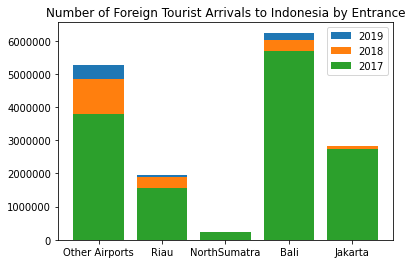

In [8]:
# Plot the Dataframe
label = ['Other Airports', 'Riau', 'NorthSumatra', 'Bali', 'Jakarta']
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax1 = ax.bar(visit_df['Airport (Name of Province)'], visit_df['2019'], tick_label=label)
ax2 = ax.bar(visit_df['Airport (Name of Province)'], visit_df['2018'], tick_label=label)
ax3 = ax.bar(visit_df['Airport (Name of Province)'], visit_df['2017'], tick_label=label)
plt.legend((ax1, ax2, ax3), ('2019', '2018', '2017'))
plt.title('Number of Foreign Tourist Arrivals to Indonesia by Entrance')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

Based on the data collected, as of 2019, the main destination for tourist in Indonesia is **Bali**.

“Bali is Indonesia's main tourist destination, with a significant rise in tourism since the 1980s. Tourism-related business makes up 80% of its economy.” - **Quoted from Wikipedia.** (https://en.wikipedia.org/wiki/Bali)
<br><br>
This concludes the first section.

## Section 2 - Data Preparation & Foursquare API

### Data Preparation

As concluded in section 1, the main destination for tourist in Indonesia is **Bali**. Continuing the discussion from *Business Idea*, in order for the business to thrive, it needs some exposure. The solution to that statement is to find the strategic location to build our restaurant in Bali, where there are alot of venues such as *Hotels*, *Villas*, other *restaurants*, etc..

In this section, my goal is to collect all the information regarding:<br>
1. How many cities are there in Bali province.
2. Each sub-district from every cities.
3. Coordinates (latitude, longitude) from each sub-district.
4. Venues categories in 500m radius from each sub-district coordinates. In order for me to get informaton regarding venues categories, I have to collect it from Foursquare using their API.

This data will have all the information needed that are required for the Explatory Data Analysis and Machine Learning - Clustering model.

**1. Collect information regarding cities and regencies in Bali province.**

The Bali province is divided into 8 regencies and 1 city. The only city is Denpasar.

In [9]:
# List of Bali regencies and city
bali_url = 'https://en.wikipedia.org/wiki/Bali'

request2 = requests.get(bali_url)

bali_url_list = pd.read_html(request2.text)

bali_province_df = bali_url_list[2]

bali_province_df = bali_province_df[['Name', 'Capital']]
bali_province_df.drop(9, axis=0)

,Name,Capital
0,Denpasar City,Denpasar
1,Badung Regency,Mangupura
2,Bangli Regency,Bangli
3,Buleleng Regency,Singaraja
4,Gianyar Regency,Gianyar
5,Jembrana Regency,Negara
6,Karangasem Regency,Amlapura
7,Klungkung Regency,Semarapura
8,Tabanan Regency,Tabanan


**2. Collect information regarding sub-districts in Bali province.**

Next, I am going to collect sub-district data from each city and regencies.

In [10]:
# Create function to collect dataframe from webpage
def collectDataframe(url):
    request = requests.get(url)
    url_list = pd.read_html(request.text)
    url_df = url_list[0]
    url_df.drop(url_df.columns[[2, 4]], axis=1, inplace=True)
    return url_df

In [11]:
# Create a list of webpage to collect dataframe
bali_df_list = ['https://kodeposresmi.com/kabupaten-kota/buleleng',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/2',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/3',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/4',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/5',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/6',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/7',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/8',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/9',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/10',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/11',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/12',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/13',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/14',
               'https://kodeposresmi.com/kabupaten-kota/buleleng/page/15',
               'https://kodeposresmi.com/kabupaten-kota/denpasar',
               'https://kodeposresmi.com/kabupaten-kota/denpasar/page/2',
               'https://kodeposresmi.com/kabupaten-kota/denpasar/page/3',
               'https://kodeposresmi.com/kabupaten-kota/denpasar/page/4',
               'https://kodeposresmi.com/kabupaten-kota/denpasar/page/5',
               'https://kodeposresmi.com/kabupaten-kota/badung',
               'https://kodeposresmi.com/kabupaten-kota/badung/page/2',
               'https://kodeposresmi.com/kabupaten-kota/badung/page/3',
               'https://kodeposresmi.com/kabupaten-kota/badung/page/4',
               'https://kodeposresmi.com/kabupaten-kota/badung/page/5',
               'https://kodeposresmi.com/kabupaten-kota/badung/page/6',
               'https://kodeposresmi.com/kabupaten-kota/badung/page/7',
               'https://kodeposresmi.com/kabupaten-kota/bangli',
               'https://kodeposresmi.com/kabupaten-kota/bangli/page/2',
               'https://kodeposresmi.com/kabupaten-kota/bangli/page/3',
               'https://kodeposresmi.com/kabupaten-kota/bangli/page/4',
               'https://kodeposresmi.com/kabupaten-kota/bangli/page/5',
               'https://kodeposresmi.com/kabupaten-kota/bangli/page/6',
               'https://kodeposresmi.com/kabupaten-kota/bangli/page/7',
               'https://kodeposresmi.com/kabupaten-kota/bangli/page/8',
               'https://kodeposresmi.com/kabupaten-kota/gianyar',
               'https://kodeposresmi.com/kabupaten-kota/gianyar/page/2',
               'https://kodeposresmi.com/kabupaten-kota/gianyar/page/3',
               'https://kodeposresmi.com/kabupaten-kota/gianyar/page/4',
               'https://kodeposresmi.com/kabupaten-kota/gianyar/page/5',
               'https://kodeposresmi.com/kabupaten-kota/gianyar/page/6',
               'https://kodeposresmi.com/kabupaten-kota/gianyar/page/7',
               'https://kodeposresmi.com/kabupaten-kota/jembrana',
               'https://kodeposresmi.com/kabupaten-kota/jembrana/page/2',
               'https://kodeposresmi.com/kabupaten-kota/jembrana/page/3',
               'https://kodeposresmi.com/kabupaten-kota/jembrana/page/4',
               'https://kodeposresmi.com/kabupaten-kota/jembrana/page/5',
               'https://kodeposresmi.com/kabupaten-kota/jembrana/page/6',
               'https://kodeposresmi.com/kabupaten-kota/karangasem',
               'https://kodeposresmi.com/kabupaten-kota/karangasem/page/2',
               'https://kodeposresmi.com/kabupaten-kota/karangasem/page/3',
               'https://kodeposresmi.com/kabupaten-kota/karangasem/page/4',
               'https://kodeposresmi.com/kabupaten-kota/karangasem/page/5',
               'https://kodeposresmi.com/kabupaten-kota/karangasem/page/6',
               'https://kodeposresmi.com/kabupaten-kota/karangasem/page/7',
               'https://kodeposresmi.com/kabupaten-kota/karangasem/page/8',
               'https://kodeposresmi.com/kabupaten-kota/klungkung',
               'https://kodeposresmi.com/kabupaten-kota/klungkung/page/2',
               'https://kodeposresmi.com/kabupaten-kota/klungkung/page/3',
               'https://kodeposresmi.com/kabupaten-kota/klungkung/page/4',
               'https://kodeposresmi.com/kabupaten-kota/klungkung/page/5',
               'https://kodeposresmi.com/kabupaten-kota/klungkung/page/6',
               'https://kodeposresmi.com/kabupaten-kota/tabanan',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/2',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/3',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/4',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/5',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/6',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/7',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/8',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/9',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/10',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/11',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/12',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/13',
               'https://kodeposresmi.com/kabupaten-kota/tabanan/page/14'
               ]

In [12]:
# Create an empty Dataframe bali_df and append the iterated bali_df_list object
bali_df = pd.DataFrame()
for i in bali_df_list: 
    df_i = collectDataframe(i)
    bali_df = bali_df.append(df_i, ignore_index=True)

# Filter dataframe to only include word 'Bali' in 'Provinsi' (province) column
bali_df = bali_df[bali_df['Provinsi'].str.contains(r'(?:\s|^)Bali(?:\s|$)')]

# Check dataframe size - Thecorrect size should be 717
print(bali_df.shape)
bali_df.head()

(717, 3)


,Provinsi,Kabupaten/Kota,Kelurahan
0,Bali,Kabupaten Buleleng,Banjar
1,Bali,Kabupaten Buleleng,Banjar Tegeha
2,Bali,Kabupaten Buleleng,Banyuatis
3,Bali,Kabupaten Buleleng,Banyusri
4,Bali,Kabupaten Buleleng,Cempaga


Bali province has 717 sub-districts.

**3. Collecting coordinates from each sub-district in Bali province.**

The next step in this data preparation section is to collect *coordinates* from each sub-district in Bali. These coordinates will be used later in the **Foursquare API** to collect *venue categories*, and those categories will be used to build **Machine Learning - Clustering** model to help us in locating a strategic location to build the restaurant in Bali.

In [13]:
# Rename column names
bali_df.columns = ['Province', 'Regency/City', 'Sub-District']

# Create new column called 'Geocoder' to improve the accuracy of the geocode
bali_df["Geocoder"] = bali_df["Sub-District"] + ", Bali, Indonesia"
bali_df.head()

,Province,Regency/City,Sub-District,Geocoder
0,Bali,Kabupaten Buleleng,Banjar,"Banjar, Bali, Indonesia"
1,Bali,Kabupaten Buleleng,Banjar Tegeha,"Banjar Tegeha, Bali, Indonesia"
2,Bali,Kabupaten Buleleng,Banyuatis,"Banyuatis, Bali, Indonesia"
3,Bali,Kabupaten Buleleng,Banyusri,"Banyusri, Bali, Indonesia"
4,Bali,Kabupaten Buleleng,Cempaga,"Cempaga, Bali, Indonesia"


In [14]:
# Using Nominatim geocoder API
geolocator = Nominatim(user_agent='chris_p_bacon') #crispy bacon! xD
geocode = geolocator.geocode
bali_df['Location'] = bali_df['Geocoder'].apply(geocode) 

In [15]:
# Check 'None' value
bali_df['Location'].isnull().sum()

43

There are 43 sub-districts that have 'None' value due to inconsistency in the spelling (e.g., Banyusri spelled as Banyuseri). Since it will take alot of time to replace the value one-by-one, I am going to remove it.

In [16]:
# Remove 'None' value
bali_df = bali_df.loc[bali_df['Location'].isnull() == False]
bali_df.shape

(674, 5)

In [17]:
# Create 'Latitude' and 'Longitude' columns
bali_df['Latitude'] = bali_df['Location'].apply(lambda loc: loc.latitude)
bali_df['Longitude'] = bali_df['Location'].apply(lambda loc: loc.longitude)
bali_df.head()

,Province,Regency/City,Sub-District,Geocoder,Location,Latitude,Longitude
0,Bali,Kabupaten Buleleng,Banjar,"Banjar, Bali, Indonesia","(Banjar, Bali, Indonesia, (-8.2050113, 114.967...",-8.205011,114.967194
1,Bali,Kabupaten Buleleng,Banjar Tegeha,"Banjar Tegeha, Bali, Indonesia","(Banjar Tegeha, Bali, Indonesia, (-8.2042161, ...",-8.204216,114.978203
2,Bali,Kabupaten Buleleng,Banyuatis,"Banyuatis, Bali, Indonesia","(Banyuatis, Bali, Indonesia, (-8.2629358, 115....",-8.262936,115.031525
4,Bali,Kabupaten Buleleng,Cempaga,"Cempaga, Bali, Indonesia","(Cempaga, Bali, 80613, Indonesia, (-8.4430303,...",-8.443030,115.355613
5,Bali,Kabupaten Buleleng,Dencarik,"Dencarik, Bali, Indonesia","(Dencarik, Bali, Indonesia, (-8.1857459, 114.9...",-8.185746,114.982595


In [18]:
# Reset index
bali_df = bali_df.reset_index(drop=True)

Since I have collected the coordinates for each sub-district, **'Location'** column is no longer necessary.

In [19]:
# Drop 'Geocoder' and 'Location' columns
bali_df.drop(columns=['Location'])
bali_df.head()

,Province,Regency/City,Sub-District,Geocoder,Location,Latitude,Longitude
0,Bali,Kabupaten Buleleng,Banjar,"Banjar, Bali, Indonesia","(Banjar, Bali, Indonesia, (-8.2050113, 114.967...",-8.205011,114.967194
1,Bali,Kabupaten Buleleng,Banjar Tegeha,"Banjar Tegeha, Bali, Indonesia","(Banjar Tegeha, Bali, Indonesia, (-8.2042161, ...",-8.204216,114.978203
2,Bali,Kabupaten Buleleng,Banyuatis,"Banyuatis, Bali, Indonesia","(Banyuatis, Bali, Indonesia, (-8.2629358, 115....",-8.262936,115.031525
3,Bali,Kabupaten Buleleng,Cempaga,"Cempaga, Bali, Indonesia","(Cempaga, Bali, 80613, Indonesia, (-8.4430303,...",-8.443030,115.355613
4,Bali,Kabupaten Buleleng,Dencarik,"Dencarik, Bali, Indonesia","(Dencarik, Bali, Indonesia, (-8.1857459, 114.9...",-8.185746,114.982595


These are the locations of each sub-district as seen on the map.

In [20]:
# Collect Bali's coordinate
coord_bali = 'Bali, Indonesia'
geolocator_bali = Nominatim(user_agent='chris_p_bacon_xD')
location_bali = geolocator_bali.geocode(coord_bali)
latitude_bali = location_bali.latitude
longitude_bali = location_bali.longitude
print('The geographical coordinate of Bali are {}, {}'.format(latitude_bali, longitude_bali))

# Create map of Bali
map_bali = folium.Map(location=[latitude_bali, longitude_bali], zoom_start=9.5)

# Add markers to the map
for lat, lng, dist in zip(bali_df['Latitude'], bali_df['Longitude'], bali_df['Geocoder']):
    label = '{}'.format(dist)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
                       radius=5,
                       popup=label,
                       color='blue',
                       fill=True,
                       fill_color='#FFD700',
                       fill_opacity=0.7,
                       parse_html=False).add_to(map_bali)

map_bali

The geographical coordinate of Bali are -8.3304977, 115.0906401


**4. Collecting venues location in 500m radius from each sub-district.**

In this section, I am going to collect information about venues location from each sub-district. To gain information regarding those venues, I have to use Foursquare API.
<br><br>
**Foursquare** lets users search for restaurants, nightlife spots, shops and other places in a location. The app displays personalized recommendations based on factors that include the time of day, a user's check-in history, their "Tastes" and their venue ratings.
<br><br>
I am going to use Foursquare to collect nearby *venues information* from each sub-district's location using its coordinate (**latitude** and **longitude**).

In [21]:
# Setup Foursquare credentials
CLIENT_ID = 'YVMNBTLCQFUIMSUJ0RMWUZL5WW5GXWKNEO1ZWFKWZ5FLH3UT'
CLIENT_SECRET = 'J2NIQH25MHXMCRZN13W0KU1ALJ1QI0DOMFCG3R0JDP44W2XG'
VERSION = '20210101' # January 1st, 2021
LIMIT = 100 # default Foursquare API limit value

In [22]:
# Create a function to repeat the process of collecting venues for each sub-district
def getNearbyVenues(names, latitudes, longitudes, radius=500): # set radius to 500 meters
    
    venues_list = [] #Create an empty list
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        #Create Foursquare API request URL
        fsq_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # Make the GET request
        results = requests.get(fsq_url).json()["response"]['groups'][0]['items']
        
        # Collect only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    # Save it into Dataframe    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Sub-District', 
                  'Sub-District Latitude', 
                  'Sub-District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Save the newly acquired information about venues in Bali into a new Dataframe.

In [23]:
bali_venues = getNearbyVenues(names=bali_df['Sub-District'],
                             latitudes=bali_df['Latitude'],
                             longitudes=bali_df['Longitude'])

In [24]:
# Check the shape of new ataframe
print(bali_venues.shape)
bali_venues.head()

(1629, 7)


,Sub-District,Sub-District Latitude,Sub-District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Banjar,-8.205011,114.967194,Hot spring,-8.208671,114.967020,Pool
1,Dencarik,-8.185746,114.982595,Cocoa Grounds,-8.185030,114.980930,Indonesian Restaurant
2,Gesing,-8.278434,115.054750,Banyan Tree,-8.281326,115.056206,Tree
3,Kaliasem,-8.170993,115.024820,Santhika,-8.169724,115.022968,Bed & Breakfast
4,Kaliasem,-8.170993,115.024820,Dolphins Points Lovina Beach,-8.175038,115.026340,Boat or Ferry


In [26]:
# Save to .csv
bali_venues.to_csv('bali_venues.csv', index=False)

This is the data that will be used in the Exploratory Data Analysis and to build a Machine Learning - Clustering model to find the location to build the restaurant.